In [ ]:
import requests
import pandas as pd
from google.colab import files
uploaded = files.upload()
!pip install openpyxl


Saving cryptos.xlsx to cryptos.xlsx


In [ ]:
def get_historic_price(symbol, after='2018-09-01'):

    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example

    resp = requests.get(url, params={
        "pair": pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()

    data = resp.json()

    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2024-12-29 01:19:33.425186')

In [ ]:
btc = get_historic_price('btc', after=last_week)

In [ ]:
eth = get_historic_price('eth', after=last_week)


###**Bitcoin:**

In [ ]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-12-28 20:00:00,94856.8,94947.4,94713.9,94906.5,20.209702
2024-12-28 21:00:00,94906.5,94991.0,94850.0,94991.0,15.647068
2024-12-28 22:00:00,94991.0,95497.0,94949.9,95212.0,58.495666
2024-12-28 23:00:00,95212.0,95212.0,95000.0,95204.1,4.088186
2024-12-29 00:00:00,95204.1,95204.1,94898.2,94975.3,12.830632


In [ ]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,95120.034524,95369.319643,94884.668452,95140.208333,53.683757
std,1839.580537,1809.421192,1893.424927,1853.737943,62.310922
min,91632.400000,92019.200000,91256.600000,91632.300000,2.397121
25%,93667.425000,93803.675000,93345.550000,93667.425000,15.015011
50%,94852.050000,94999.500000,94688.950000,94870.550000,31.996712
75%,96721.125000,96959.350000,96500.025000,96724.550000,64.423508
max,98550.100000,98888.000000,98493.000000,98550.000000,329.418984


In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2024-12-28 20:00:00 to 2025-01-04 19:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   168 non-null    float64
 1   HighPrice   168 non-null    float64
 2   LowPrice    168 non-null    float64
 3   ClosePrice  168 non-null    float64
 4   Volume      168 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


<Axes: xlabel='CloseTime'>

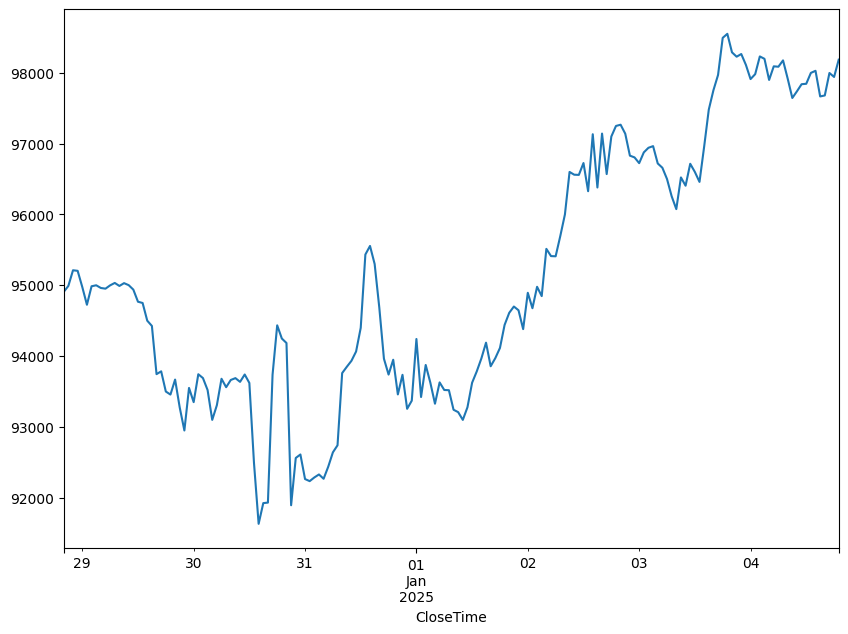

In [ ]:
btc['ClosePrice'].plot(figsize=(10, 7))


###**Ether:**

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-12-29 02:00:00,3373.01,3385.75,3372.00,3382.02,85.835060
2024-12-29 03:00:00,3382.01,3382.02,3372.39,3376.33,42.381311
2024-12-29 04:00:00,3376.33,3383.50,3375.95,3380.70,144.902095
2024-12-29 05:00:00,3380.70,3385.00,3379.24,3380.83,114.272397
2024-12-29 06:00:00,3381.60,3389.86,3376.68,3389.86,92.546738


<Axes: xlabel='CloseTime'>

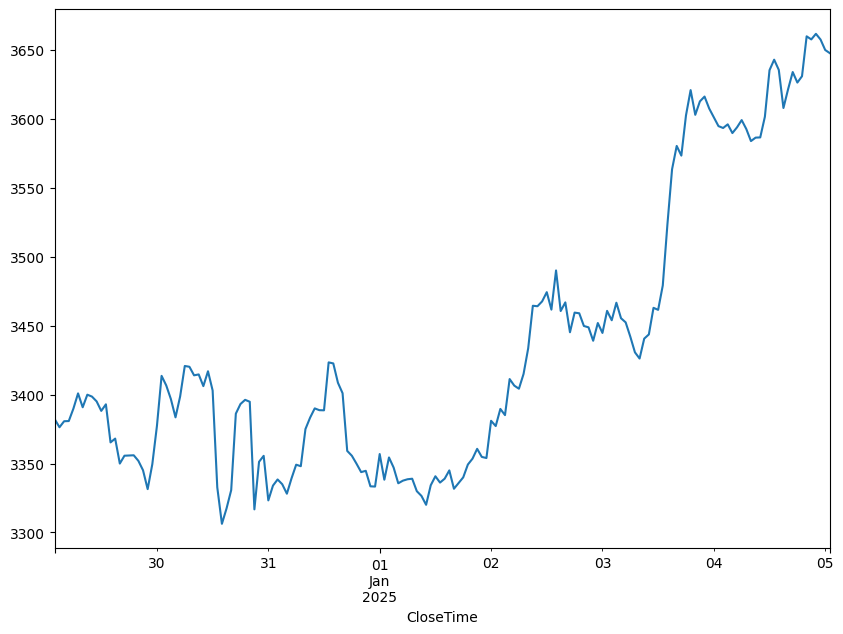

In [ ]:
eth['ClosePrice'].plot(figsize=(10, 7))

In [ ]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2024-12-29 02:00:00 to 2025-01-05 01:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   168 non-null    float64
 1   HighPrice   168 non-null    float64
 2   LowPrice    168 non-null    float64
 3   ClosePrice  168 non-null    float64
 4   Volume      168 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


###**Excel:**

In [ ]:
arquivo = 'cryptos.xlsx'

In [ ]:
df = pd.read_excel('cryptos.xlsx', engine='openpyxl')

In [ ]:
df.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
0,2019-03-20 14:00:00,3998.64,4002.52,3993.50,3998.00,173.321628,6.928502e+05
1,2019-03-20 15:00:00,3998.83,4004.95,3993.00,4004.95,347.431239,1.388839e+06
2,2019-03-20 16:00:00,4006.00,4008.00,3992.00,3998.85,232.962893,9.317110e+05
3,2019-03-20 17:00:00,3998.84,4021.02,3994.84,4002.50,781.703067,3.138661e+06
4,2019-03-20 18:00:00,4001.56,4005.41,3992.97,3998.60,171.735476,6.867960e+05


<Axes: >

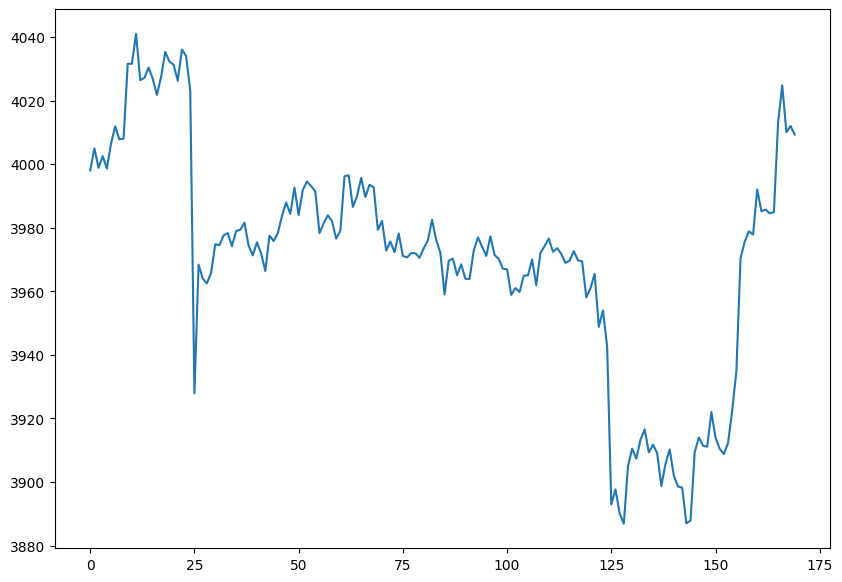

In [ ]:
df['ClosePrice'].plot(figsize=(10, 7))

In [ ]:
df.describe()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02
mean,2019-03-24 02:30:00,3969.990235,3976.743176,3962.801412,3970.145529,211.089447,8.382222e+05
min,2019-03-20 14:00:00,3885.080000,3891.180000,3850.450000,3886.860000,31.941575,1.268007e+05
25%,2019-03-22 08:15:00,3962.882500,3968.595000,3956.090000,3962.840000,83.006866,3.303572e+05
50%,2019-03-24 02:30:00,3973.685000,3978.555000,3969.040000,3974.120000,138.470907,5.490165e+05
75%,2019-03-25 20:45:00,3988.650000,3995.695000,3982.775000,3989.262500,227.911560,8.984856e+05
max,2019-03-27 15:00:00,4040.690000,4055.350000,4031.590000,4041.010000,1584.091876,6.196581e+06
std,NaN,36.239416,36.277294,37.347282,36.243060,243.215062,9.663251e+05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CloseTime   170 non-null    datetime64[ns]
 1   OpenPrice   170 non-null    float64       
 2   HighPrice   170 non-null    float64       
 3   LowPrice    170 non-null    float64       
 4   ClosePrice  170 non-null    float64       
 5   Volume      170 non-null    float64       
 6   NA          170 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 9.4 KB
